# Question 9.1

In [14]:
from json import loads
import os
import pandas as pd
import numpy as np
from collections import defaultdict
import datetime

tweet_directory = './ECE219_tweet_data/'

statistics = []

# process each hashtag file
for file in os.listdir(tweet_directory):
    hashtag_name = file.split('.')[0].split('_')[1]

    # initializing
    total_followers = 0
    total_retweets = 0
    tweet_count = 0
    tweets_per_hour = defaultdict(int)

    earliest_time = float('inf')
    latest_time = float('-inf')

    with open(os.path.join(tweet_directory, file), encoding="utf8") as tweet_file:
        for line in tweet_file:
            tweet_data = loads(line.strip())

            followers_count = tweet_data['author']['followers']
            retweets_count = tweet_data['metrics']['citations']['total']
            tweet_time = tweet_data['citation_date']

            # convert to hourly timestamp
            timestamp = datetime.datetime.fromtimestamp(tweet_time)
            hourly_timestamp = timestamp.replace(minute=0, second=0, microsecond=0)

            total_followers += followers_count
            total_retweets += retweets_count
            tweets_per_hour[hourly_timestamp] += 1
            tweet_count += 1

            # track earliest and latest tweet timestamps
            earliest_time = min(earliest_time, tweet_time)
            latest_time = max(latest_time, tweet_time)

    # compute total hours in the dataset (including empty hours)
    total_hours = (latest_time - earliest_time) / 3600
    avg_tweets_per_hour = tweet_count / total_hours if total_hours else 0
    avg_followers_per_tweet = total_followers / tweet_count if tweet_count else 0
    avg_retweets_per_tweet = total_retweets / tweet_count if tweet_count else 0

    statistics.append({
        "Hashtag": hashtag_name,
        "Avg Tweets per Hour": avg_tweets_per_hour,
        "Avg Followers per Tweet": avg_followers_per_tweet,
        "Avg Retweets per Tweet": avg_retweets_per_tweet
    })

df_statistics = pd.DataFrame(statistics)
df_statistics.set_index("Hashtag", inplace=True)

# descending order based on Avg Tweets per Hour
df_statistics = df_statistics.sort_values(by="Avg Tweets per Hour", ascending=False)

# Display results
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False) 
pd.set_option('display.float_format', '{:.4f}'.format)  

print(df_statistics)

             Avg Tweets per Hour  Avg Followers per Tweet  Avg Retweets per Tweet
Hashtag                                                                          
#superbowl             2072.1184                8814.9680                  2.3912
#sb49                  1276.8571               10374.1603                  2.5271
#patriots               750.8943                3280.4636                  1.7853
#nfl                    397.0214                4662.3754                  1.5345
#gohawks                292.4879                2217.9237                  2.0132
#gopatriots              40.9547                1427.2526                  1.4082


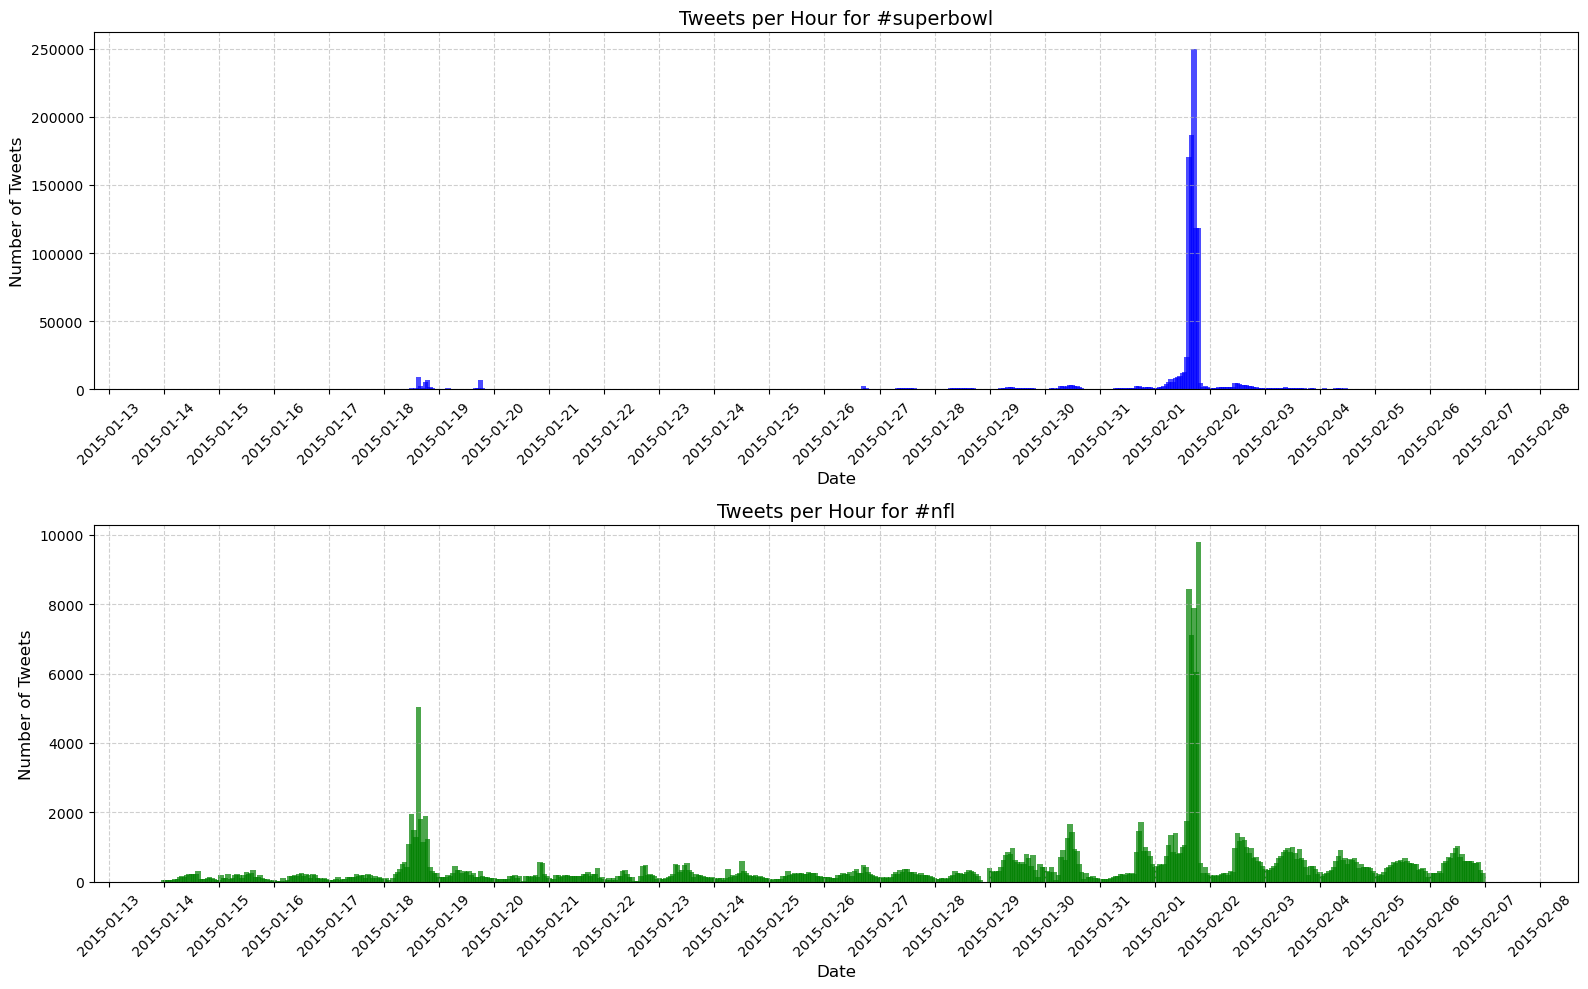

In [40]:
from json import loads
import os
import pandas as pd
import numpy as np
from collections import defaultdict
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

tweet_directory = './ECE219_tweet_data/'

def process_hashtag_file(file):
    hashtag_name = file.split('.')[0].split('_')[1]
    tweets_per_hour = defaultdict(int)

    with open(os.path.join(tweet_directory, file), encoding="utf8") as tweet_file:
        for line in tweet_file:
            tweet_data = loads(line.strip())
            tweet_time = tweet_data['citation_date']

            # convert to hourly timestamp
            timestamp = datetime.datetime.fromtimestamp(tweet_time)
            hourly_timestamp = timestamp.replace(minute=0, second=0, microsecond=0)

            tweets_per_hour[hourly_timestamp] += 1

    return hashtag_name, tweets_per_hour

superbowl_file = 'tweets_#superbowl.txt'
nfl_file = 'tweets_#nfl.txt'

superbowl_hashtag, superbowl_tweets_per_hour = process_hashtag_file(superbowl_file)
nfl_hashtag, nfl_tweets_per_hour = process_hashtag_file(nfl_file)

# converting to defaultdict to a dataframe to make plotting easier
superbowl_df = pd.DataFrame(list(superbowl_tweets_per_hour.items()), columns=['Time', 'Tweets'])
nfl_df = pd.DataFrame(list(nfl_tweets_per_hour.items()), columns=['Time', 'Tweets'])

# sort the dataframes by time
superbowl_df = superbowl_df.sort_values(by='Time')
nfl_df = nfl_df.sort_values(by='Time')

# plot data
plt.figure(figsize=(16, 10)) 

# plot for #superbowl
plt.subplot(2, 1, 1)
plt.bar(superbowl_df['Time'], superbowl_df['Tweets'], color='blue', alpha=0.7, width=0.1)  # Increased bar width
plt.title(f'Tweets per Hour for {superbowl_hashtag}', fontsize=14)
plt.xlabel('Date', fontsize=12) 
plt.ylabel('Number of Tweets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# showing by date since labeling by hour is too hard to read
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
plt.xticks(rotation=45)  

# plot for #nfl
plt.subplot(2, 1, 2)
plt.bar(nfl_df['Time'], nfl_df['Tweets'], color='green', alpha=0.7, width=0.1) 
plt.title(f'Tweets per Hour for {nfl_hashtag}', fontsize=14)
plt.xlabel('Date', fontsize=12) 
plt.ylabel('Number of Tweets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# formatting for date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()